In [ ]:
# Ver dicas para transformação BOX-COX com Auto-Arima - exemplo completo
# https://alkaline-ml.com/pmdarima/usecases/sun-spots.html

In [ ]:
# RMSE / R2
# https://ivanildo-batista13.medium.com/autoarima-em-python-26303d650de3

# https://alkaline-ml.com/pmdarima/auto_examples/arima/example_auto_arima.html

In [ ]:
# Fonte: Prof Fernando Amaral

# https://www.youtube.com/watch?v=ccupZdvYCn4

In [ ]:
# Versão ajustada para Treino/Teste

In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,6

In [ ]:
!pip install pmdarima

In [12]:
from pmdarima.arima import auto_arima

In [13]:
from sklearn.metrics import mean_squared_error, r2_score

In [108]:
df = pd.read_excel('/content/DataFrame_Processos_Percentual_Base_Completa.xlsx')
df.Dtinicio = pd.to_datetime(df.DiaInicio)
df.set_index('DiaInicio', inplace=True)
df.head(3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


,DtHoraInicio,DtHoraFim,Processo,TempoMinutos,TempoMinutosInicioExecucao
DiaInicio,,,,,
2021-01-05,2021-01-05 05:21:00,2021-01-05 07:40:00,Rotina_01,139,321.0
2021-01-06,2021-01-06 04:13:00,2021-01-06 05:54:00,Rotina_01,101,253.0
2021-01-07,2021-01-07 03:30:00,2021-01-07 05:24:00,Rotina_01,114,210.0


In [109]:
# Filtra somente pelo Processo 04 - caso de uso para avaliação em questão
# Foi o que a princípio apresentou lentidão ao rodar em concorrência com o Processo 01
df = df.loc[df['Processo']=='Rotina_04'] #--> este é o correto

#### apenas para testes - fazer com base menor
#df = df.loc[(df['Processo']=='Rotina_04') & (df['DtHoraInicio']>='2021-09-01')]
#### apenas para testes


# Cria Dataframe somente com as colunas que interessam
df = pd.DataFrame(df, columns = ['TempoMinutos'])
df.head(3)

,TempoMinutosInicioExecucao
DiaInicio,
2021-01-05,164.0
2021-01-06,136.0
2021-01-07,267.0


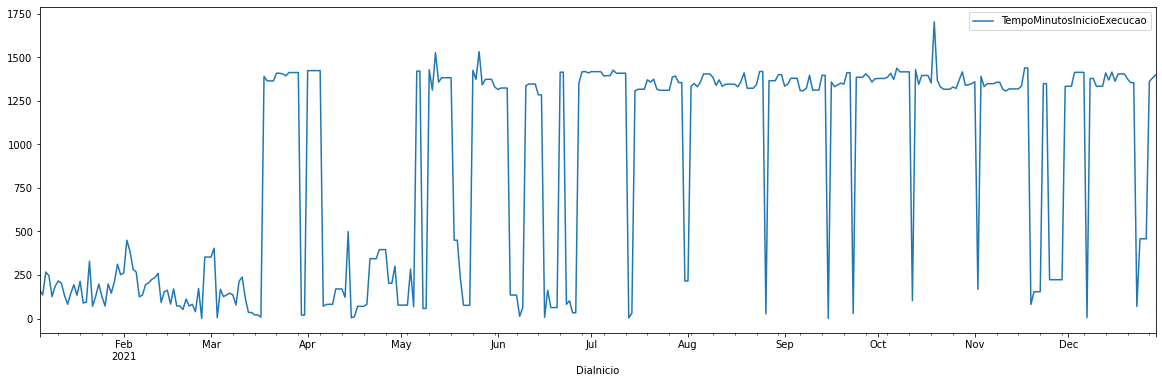

In [110]:
df.plot()

In [111]:
# Define tamanho da base
tamanho_base = df.count() # 359 linhas

In [112]:
# Define tamanho base Treino e Teste - usaremos inicialmente 2/3 para treinar e 1/3 para testar
train_size = int(tamanho_base * 2 / 3)
train_size

239

In [113]:
# Define bases de treino
train_set = df[:train_size]
train_set.head(3)

,TempoMinutosInicioExecucao
DiaInicio,
2021-01-05,164.0
2021-01-06,136.0
2021-01-07,267.0


In [114]:
# Define bases de teste
test_set = df[train_size:]
test_set.head(3)

,TempoMinutosInicioExecucao
DiaInicio,
2021-09-01,1335.0
2021-09-02,1346.0
2021-09-03,1380.0


In [ ]:
# EXECUTAR AUTO-ARIMA

In [115]:
# Com stepwise=True
train_model = auto_arima(train_set, start_p=0, start_q=0, max_p=7, max_q=11, m=12, start_P=0, seasonal=True,d=1,D=1,trace=True,error_action='ignore', suppress_warnings=True, stepwise=True, return_valid_fits=False)
# trace é para visualizar a saída
# return_valid_fits=False --> se colocar True irá retornar uma matriz com todo modelos válidos, com False retorna apenas o melhor

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=inf, Time=0.39 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=3530.423, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=3460.356, Time=0.28 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.45 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=3531.658, Time=0.02 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=3423.333, Time=0.60 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=3.38 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=1.11 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=3422.626, Time=0.44 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=3459.141, Time=0.15 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=1.39 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=0.44 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=3421.916, Time=0.67 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=3459.716, Time=0.29 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=inf, T

In [116]:
train_model.aic()

3401.7820937180404

In [117]:
train_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  239
Model:             SARIMAX(0, 1, 2)x(2, 1, [], 12)   Log Likelihood               -1695.891
Date:                             Fri, 05 Aug 2022   AIC                           3401.782
Time:                                     02:38:34   BIC                           3418.885
Sample:                                          0   HQIC                          3408.684
                                             - 239                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.1937      0.071     -2.723      0.006      -0.333      -0.054
ma.L2         -0.3606      0.055     -6.578      0.000      -0.468      -0.253
ar.S.L12      -0.7482      0.047    -15.801      0.000      -0.841      -0.655
ar.S.L24      -0.4330      0.054     -8.002      0.000      -0.539      -0.327
sigma2      1.874e+05   1.13e+04     16.601      0.000    1.65e+05    2.09e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.32   Jarque-Bera (JB):               177.73
Prob(Q):                              0.57   Prob(JB):                         0.00
Heteroskedasticity (H):               2.12   Skew:                            -0.32
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.30
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
# CALCULAR RMSE - Avaliação do modelo
# Abaixo temos duas métricas de avaliação : o RMSE e R². A primeira é mais usada para 
# comparar entre vários modelos, onde o melhor modelo é aquele cujo valor dessa métrica 
# esteja mais próximo de zero. O segundo (R²) nos dá o quanto os valores treinados/preditos 
# estão alinhados com os valores de treino

In [118]:
# Base = 359    # Treino = 239     # Teste = 359 - 239 = 120 (* ver acima está com 4/5 ao invés de 2/3)
#tamanho_base_teste = test_set.shape[0]
tamanho_base_teste = int(test_set.count()) # Necessário converter para int pois dava erro na linha abaixo por estar como Int64
future_forecast = train_model.predict(n_periods=tamanho_base_teste) 
future_forecast = pd.DataFrame(future_forecast, index=test_set.index, columns=['TempoMinutos'])

In [119]:
print("RMSE do modelo (teste vs previsões): %.3f" % np.sqrt(mean_squared_error(test_set, future_forecast)))
print("R² do modelo (teste vs previsões): %.3f" % r2_score(test_set, future_forecast))

RMSE do modelo (teste vs previsões): 478.326
R² do modelo (teste vs previsões): -0.252


In [ ]:
# Avaliar comportamento do modelo na base de teste

In [21]:
train_model

ARIMA(order=(4, 1, 0), scoring_args={}, seasonal_order=(2, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)

In [ ]:
# Efetuar
#train_model.fit(train_set)
# --> modelo ja foi ajustado no AutoARIMA

ARIMA(order=(0, 1, 1), scoring_args={}, seasonal_order=(0, 1, 1, 12),
      suppress_warnings=True, with_intercept=False)

In [40]:
future_forecast

,TempoMinutos
DiaInicio,
2021-10-19,142.641295
2021-10-20,138.803655
2021-10-21,98.726791
2021-10-22,144.772550
2021-10-23,119.469315
...,...
2021-12-25,103.318036
2021-12-26,60.316500
2021-12-27,61.081440


In [31]:
test_set

,TempoMinutos
DiaInicio,
2021-10-19,87
2021-10-20,133
2021-10-21,204
2021-10-22,103
2021-10-23,106
...,...
2021-12-25,188
2021-12-26,156
2021-12-27,132


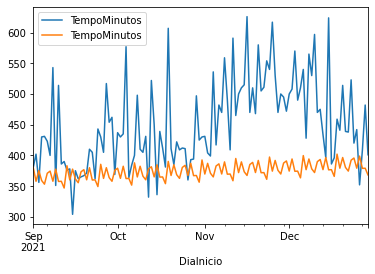

In [92]:
pd.concat([test_set, future_forecast], axis=1).plot()

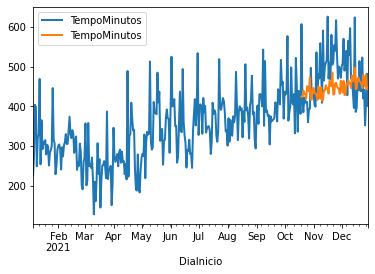

In [59]:
pd.concat([df, future_forecast], axis=1).plot(linewidth=2)